# DBSCAN Project  

## The Data
#### by Joshua Rodriguez
Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

Data Set Information:

Provide all relevant information about your data set.

Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
    
Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717
Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('Wholesale customers data.csv', sep=',', header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


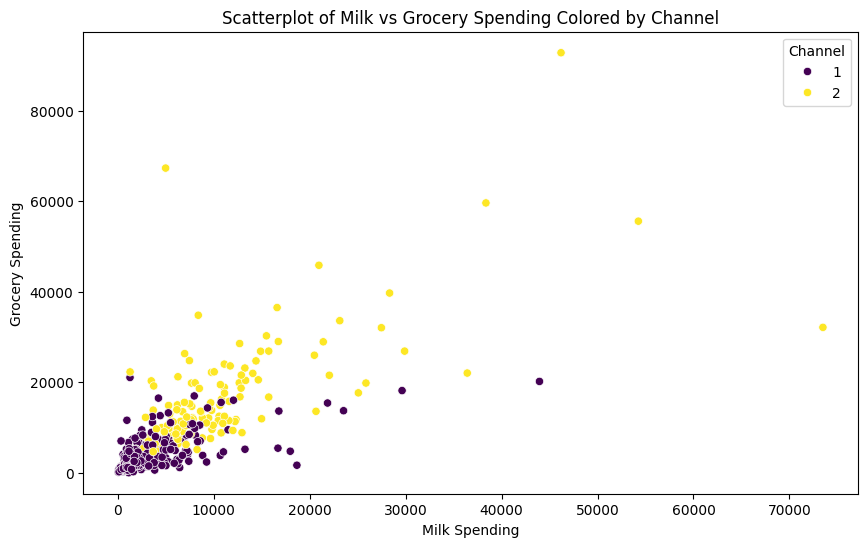

In [7]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette='viridis')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.title('Scatterplot of Milk vs Grocery Spending Colored by Channel')
plt.show()

# Create a histogram of Milk spending colored by Channel

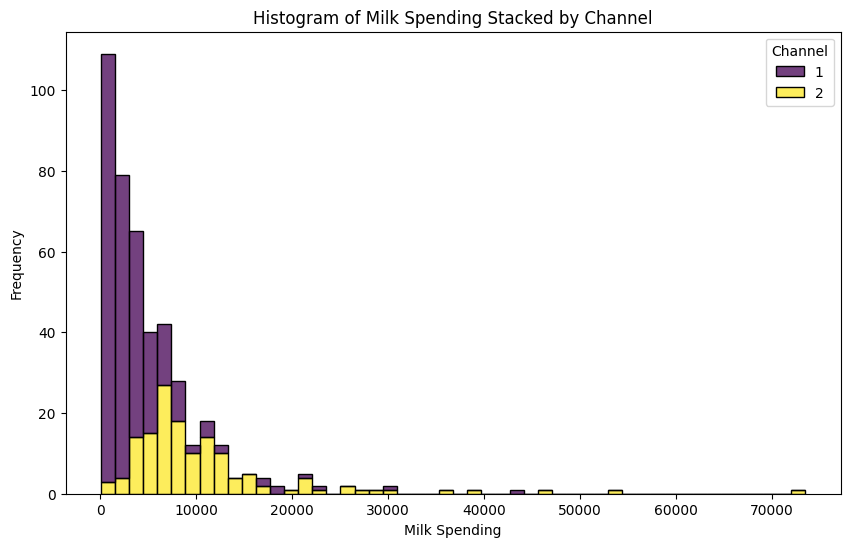

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack', palette='viridis')
plt.xlabel('Milk Spending')
plt.ylabel('Frequency')
plt.title('Histogram of Milk Spending Stacked by Channel')
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

<Figure size 1200x800 with 0 Axes>

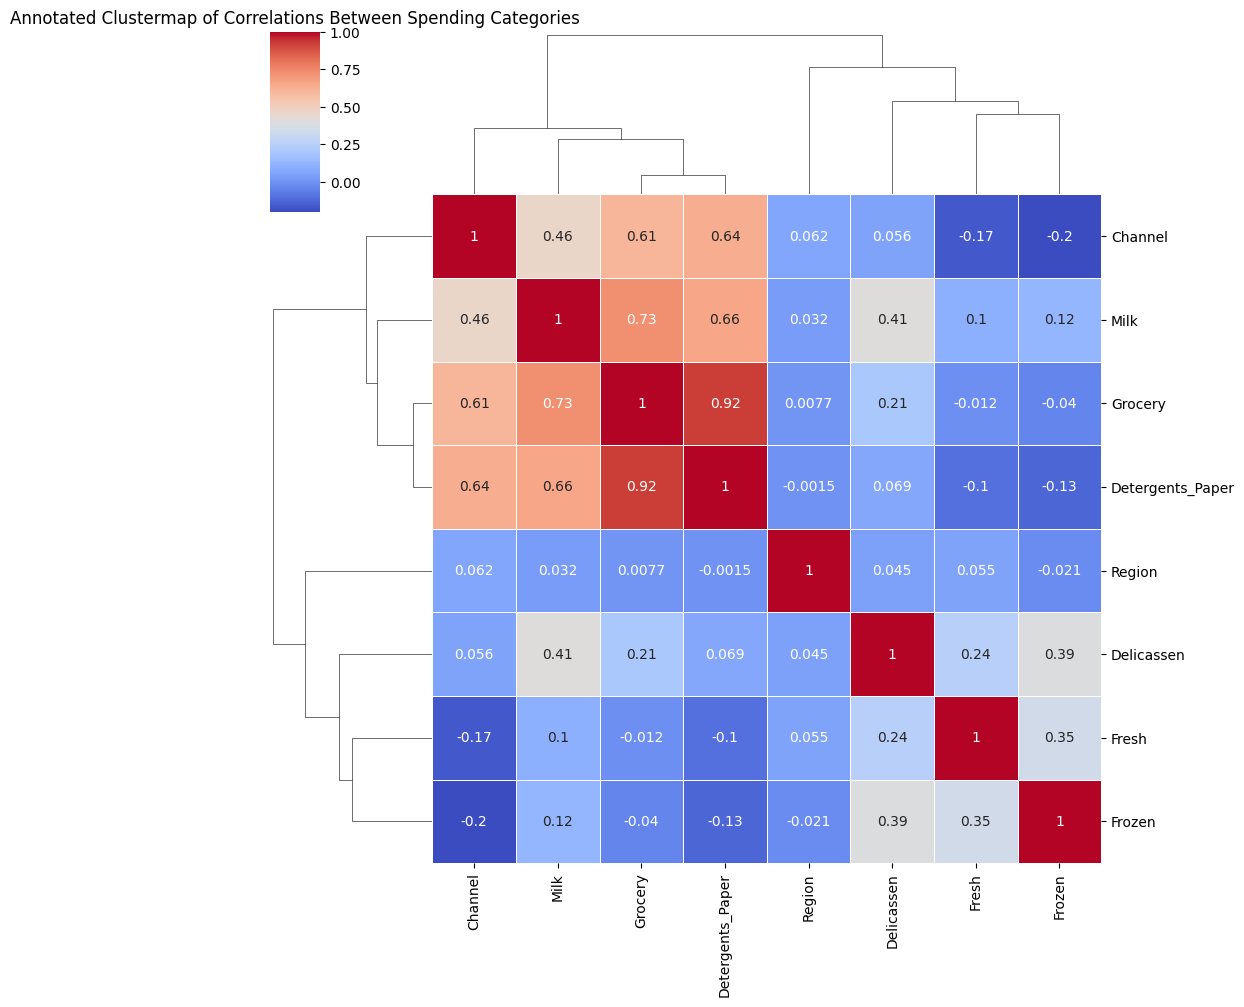

In [9]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.clustermap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Annotated Clustermap of Correlations Between Spending Categories')
plt.show()

**TASK: Create a PairPlot of the dataframe, colored by Region.**

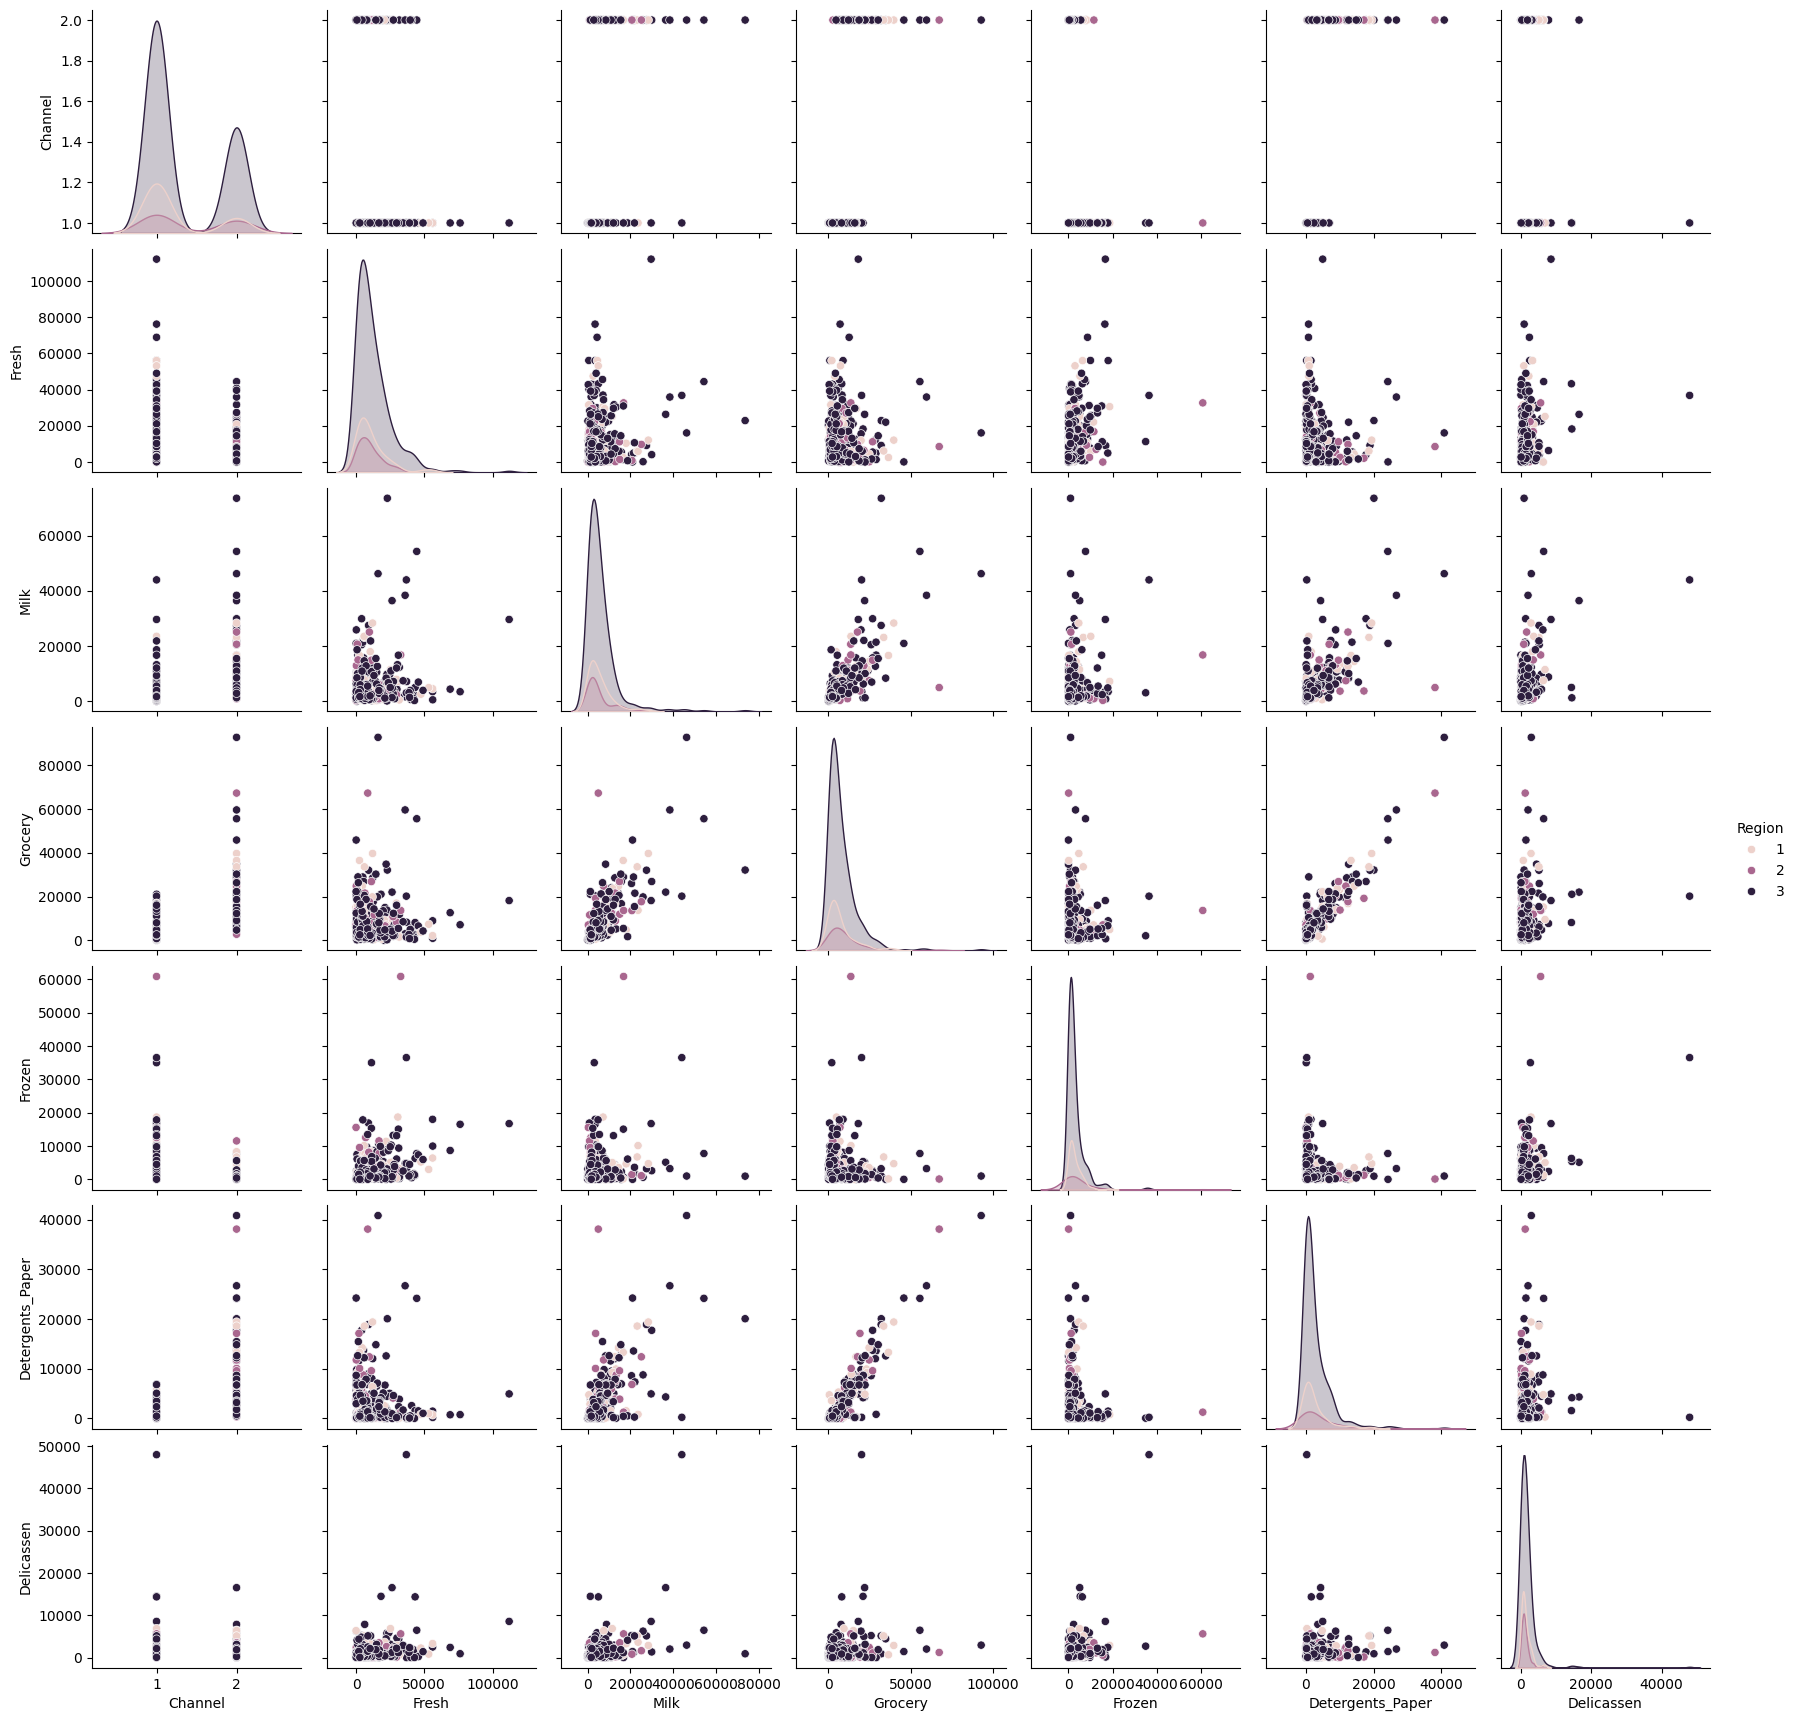

In [12]:
sns.pairplot(df, hue='Region')

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [19]:
epsilon_values = np.arange(0.1, 2.0, 0.1)

# Number of features
num_features = scaled_data.shape[1]

# Minimum samples
min_samples = 2 * num_features

# List to store percentage of outliers for each epsilon
outliers_percentages = []

# Loop through different epsilon values
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    
    # Calculate the percentage of outliers
    outliers = (labels == -1)
    outliers_percentage = np.sum(outliers) / len(labels) * 100
    outliers_percentages.append(outliers_percentage)
    
    print(f'Epsilon: {epsilon}, Percentage of Outliers: {outliers_percentage:.2f}%')

# Creating a DataFrame to better visualize the results
results_df = pd.DataFrame({'Epsilon': epsilon_values, 'Outliers_Percentage': outliers_percentages})
print(results_df)

Epsilon: 0.1, Percentage of Outliers: 100.00%
Epsilon: 0.2, Percentage of Outliers: 100.00%
Epsilon: 0.30000000000000004, Percentage of Outliers: 100.00%
Epsilon: 0.4, Percentage of Outliers: 83.41%
Epsilon: 0.5, Percentage of Outliers: 75.68%
Epsilon: 0.6, Percentage of Outliers: 71.14%
Epsilon: 0.7000000000000001, Percentage of Outliers: 62.73%
Epsilon: 0.8, Percentage of Outliers: 47.50%
Epsilon: 0.9, Percentage of Outliers: 33.86%
Epsilon: 1.0, Percentage of Outliers: 26.36%
Epsilon: 1.1, Percentage of Outliers: 22.27%
Epsilon: 1.2000000000000002, Percentage of Outliers: 20.91%
Epsilon: 1.3000000000000003, Percentage of Outliers: 19.32%
Epsilon: 1.4000000000000001, Percentage of Outliers: 15.45%
Epsilon: 1.5000000000000002, Percentage of Outliers: 13.41%
Epsilon: 1.6, Percentage of Outliers: 10.68%
Epsilon: 1.7000000000000002, Percentage of Outliers: 8.41%
Epsilon: 1.8000000000000003, Percentage of Outliers: 7.73%
Epsilon: 1.9000000000000001, Percentage of Outliers: 6.59%
    Epsil

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

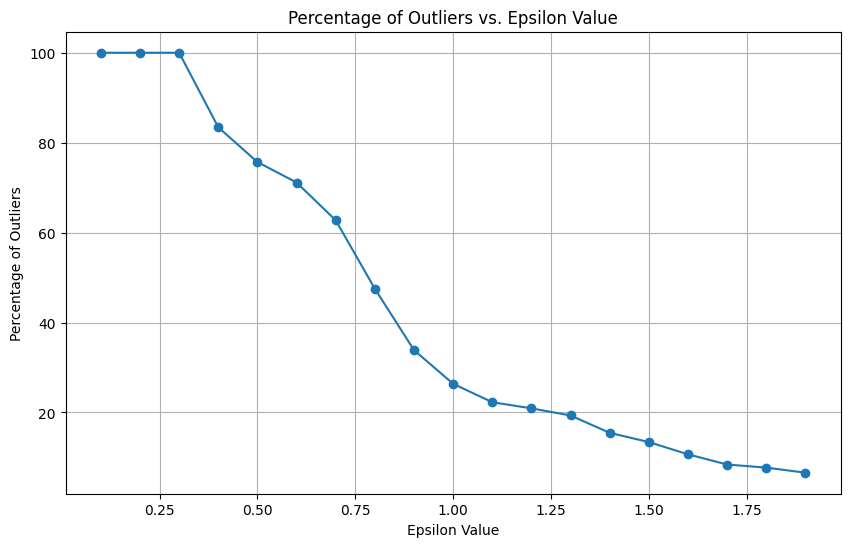

In [20]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, outliers_percentages, marker='o', linestyle='-')
plt.title('Percentage of Outliers vs. Epsilon Value')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers')
plt.grid(True)
plt.show()

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [21]:
model = DBSCAN(eps=0.5)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

In [22]:
labels = model.fit_predict(df)

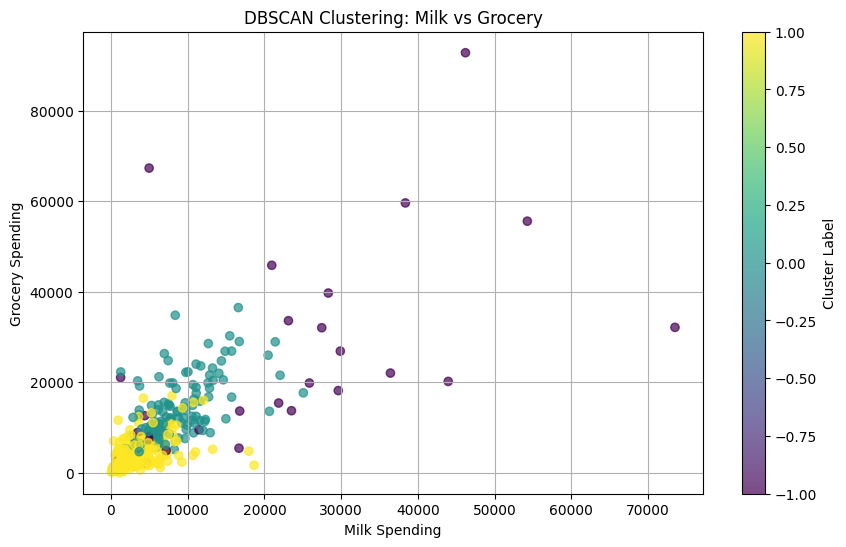

In [26]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Grocery'], c=dbscan.labels_, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering: Milk vs Grocery')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

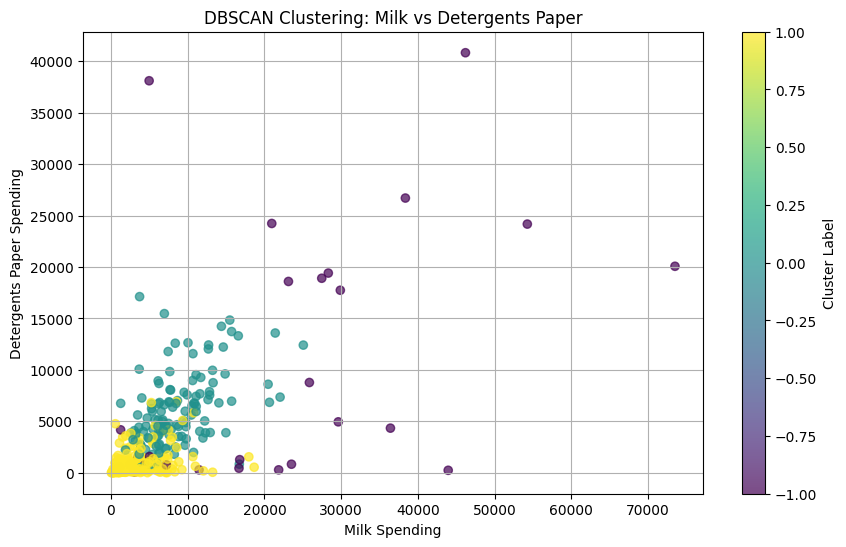

In [27]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Detergents_Paper'], c=dbscan.labels_, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering: Milk vs Detergents Paper')
plt.xlabel('Milk Spending')
plt.ylabel('Detergents Paper Spending')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [30]:
df['Labels'] = dbscan.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [32]:
mean_spending = df.groupby('Labels').mean()

# Display the mean spending for each category
print(mean_spending)

         Channel    Region         Fresh          Milk       Grocery  \
Labels                                                                 
-1      1.448276  2.413793  30055.827586  21093.724138  24141.517241   
 0      2.000000  2.620155   8227.666667   8615.852713  13859.674419   
 1      1.000000  2.521277  11869.301418   2933.312057   3583.546099   

              Frozen  Detergents_Paper   Delicassen  
Labels                                               
-1      10830.758621       9716.551724  6169.655172  
 0       1447.759690       5969.581395  1498.457364  
 1       3017.010638        765.960993  1059.297872  


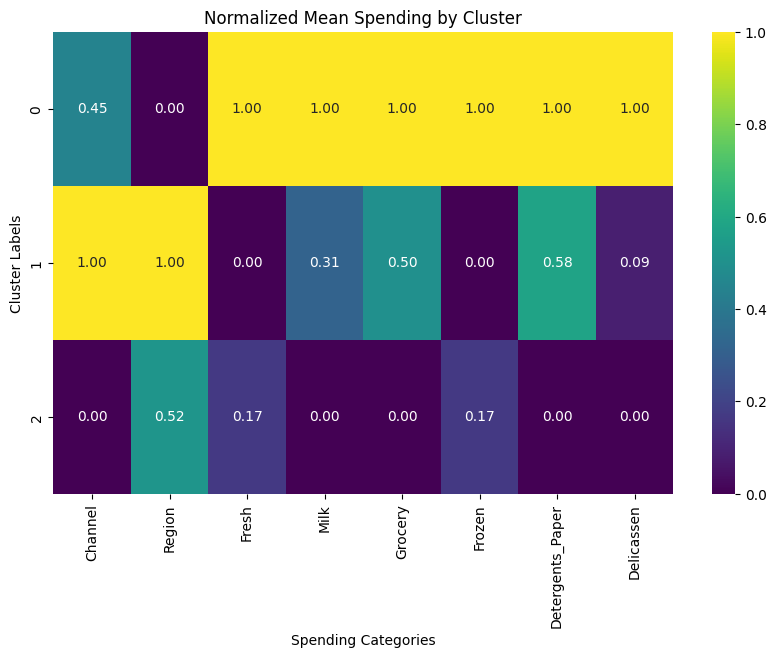

In [35]:
scaler = MinMaxScaler()
# Normalize the dataframe
normalized_df = pd.DataFrame(scaler.fit_transform(mean_spending), columns=mean_spending.columns)

# Create a heatmap of the normalized values
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('Normalized Mean Spending by Cluster')
plt.xlabel('Spending Categories')
plt.ylabel('Cluster Labels')
plt.show()

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

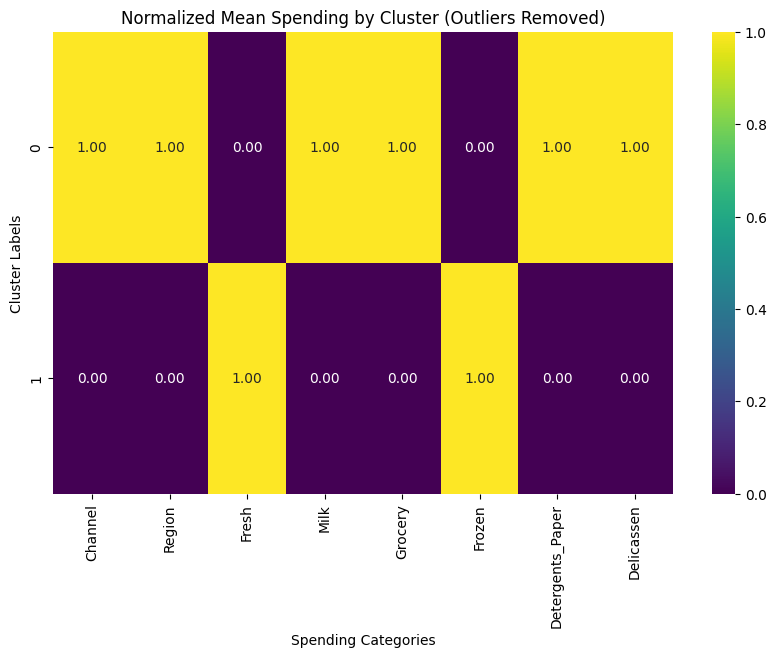

In [43]:
df['Labels'] = dbscan.labels_

# Remove outliers
filtered_df = df[df['Labels'] != -1]  # Assuming outliers are labeled as -1

# Calculate mean spending for each category within each cluster
mean_spending_filtered = filtered_df.groupby('Labels').mean()

# Normalize the dataframe
scaler = MinMaxScaler()
normalized_df_filtered = pd.DataFrame(scaler.fit_transform(mean_spending_filtered), columns=mean_spending_filtered.columns)

# Create a heatmap of the normalized values
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df_filtered, annot=True, cmap='viridis', fmt='.2f')
plt.title('Normalized Mean Spending by Cluster (Outliers Removed)')
plt.xlabel('Spending Categories')
plt.ylabel('Cluster Labels')
plt.show()

**TASK: What spending category were the two clusters mode different in?**

The values of Delicassen are different between the heatmaps 